In [141]:
import random
import networkx as nx
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import powerlaw
import scipy.special as ssp
from scipy.optimize import curve_fit

In [2]:
class RandomGraph():
    def __init__(self, nodes=2000):
        self._num_of_nodes = nodes
        self._g = nx.Graph()
        self._nodes = []
        
    def generate(self, p = 0.5):
        self._nodes = list(range(0, self._num_of_nodes))
        random.shuffle(self._nodes)
        self._g.add_nodes_from(self._nodes)
        for n1 in self._nodes:
            for n2 in self._nodes:
                if n1 != n2 and np.random.uniform(0, 1) < p:
                    self._g.add_edge(n1, n2)
        return self._g

In [113]:
class Watts_Strogatz_model():
    def __init__(self, nodes=2000):
        self._num_of_nodes = nodes
        self._g = nx.Graph()
        self._nodes = []
        self._K = 0
        self._p = 0

    def generate_ring(self, K):
        # add K parameter 
        self._nodes = list(range(0, self._num_of_nodes))
        for n in self._nodes:
            for i in range(1, K+1):
                self._g.add_edge(n, self._nodes[n-i])
            #self._g.add_edge(n, self._nodes[n-2])
        return self._g
    
    def generate(self, p, K=4):
        self._K = K
        self._p = p
        K = K/2
        if int(K) != K:
            raise Exception('K must me an even number')
        self.generate_ring(int(K))
        for i in range(len(self._nodes)):
            ns = self._g.neighbors(self._nodes[i])
            for n in list(ns):
                if self._nodes[i] < n:
                    if np.random.uniform(0, 1) < p:
                        new_connection = self._nodes[random.randint(0, self._num_of_nodes-1)]
                        while (new_connection == self._nodes[i] or self._g.has_edge(self._nodes[i], new_connection)):
                            new_connection = self._nodes[random.randint(0, self._num_of_nodes-1)]
                        self._g.add_edge(self._nodes[i], new_connection)
                        self._g.remove_edge(self._nodes[i], n)
        return self._g
    
    def degree_distribution(self):
        pk = []
        for k in range(int(self._K/2), 100):
            pk.append(sum(ssp.binom(self._K/2, j)*(1-self._p)**j * self._p**(self._K/2 - j) * ((self._p*self._K/2)**(k-j-self._K/2))/(math.factorial(k-j-self._K/2)) * np.exp(-self._p*self._K/2)  for j in range(min([int(k-self._K/2), int(self._K/2)]))))
        return pk

In [82]:
class Barabasi_Albert_model():
    def __init__(self, nodes=2000):
        self._num_of_nodes = nodes
        self._nodes = []
        self._g = nx.Graph()
      
    def startup(self, m_0=3):
        self._nodes = list(range(0, m_0))
        for n1 in self._nodes:
            for n2 in self._nodes:
                if n1 != n2:
                    self._g.add_edge(n1, n2)
        return self._g
                    
    def generate(self, m_0=3):
        self.startup(m_0)
        for i in range(m_0, self._num_of_nodes):
            degrees = [val for (node, val) in self._g.degree()]
            deg_sum = sum(degrees)
            ps = [self._g.degree(j)/deg_sum for j in self._nodes]
            new_neighbor1, new_neighbor2 = random.choices(self._nodes, weights=ps, k=2)
            self._g.add_edge(i, new_neighbor1)
            self._g.add_edge(i, new_neighbor2)
            self._nodes.append(i)
        return self._g

### Visualizations for graphs with 20 nodes

In [83]:
RG = RandomGraph(20).generate(0.4)

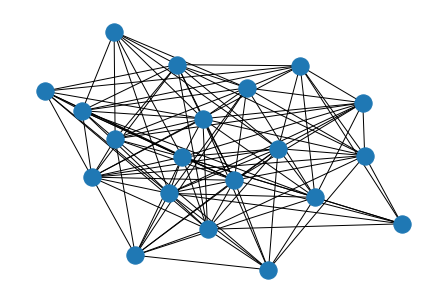

In [84]:
nx.draw(RG)

In [7]:
WSM = Watts_Strogatz_model(20).generate(0.5, K=4)

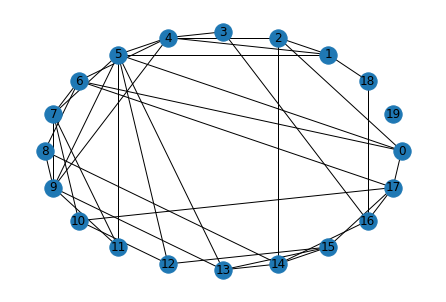

In [8]:
nx.draw_circular(WSM, with_labels=True)

In [9]:
BAM = Barabasi_Albert_model(20).generate()

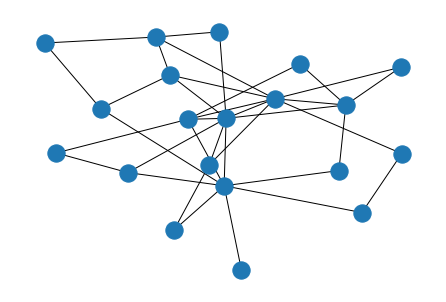

In [10]:
nx.draw(BAM)

#### Random Graph

In [11]:
RG = RandomGraph().generate()

Number of nodes: 2000
Number of edges: 1498192
Average degree: 1498.192
Variance of degree: 352.83813599999996


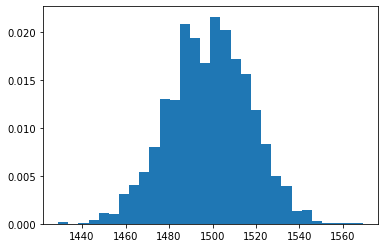

In [12]:
print(f"Number of nodes: {RG.number_of_nodes()}")
print(f"Number of edges: {RG.number_of_edges()}")
degrees = [val for (node, val) in RG.degree()]
print(f"Average degree: {np.mean(degrees)}")
print(f"Variance of degree: {np.var(degrees)}")
plt.hist(degrees, density=True, bins=30)
plt.show()

In [123]:
res = stats.rv_continuous.fit(stats.binom, degrees)

AttributeError: 'binom_gen' object has no attribute '_fitstart'

#### Watts-Strogatz model

In [114]:
WSMObj = Watts_Strogatz_model()

In [115]:
WSM = WSMObj.generate(0.5)

Number of nodes: 2000
Number of edges: 4000
Average degree: 4.0
Variance of degree: 1.547


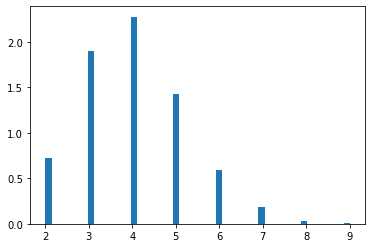

In [116]:
print(f"Number of nodes: {WSM.number_of_nodes()}")
print(f"Number of edges: {WSM.number_of_edges()}")
degrees = [val for (node, val) in WSM.degree()]
print(f"Average degree: {np.mean(degrees)}")
print(f"Variance of degree: {np.var(degrees)}")
plt.hist(degrees, density=True, bins=50)
plt.show()

In [117]:
distr_fit = WSMObj.degree_distribution()

C:\Users\lab\AppData\Local\Temp\ipykernel_14024\4152333578.py:40: DeprecationWarning: Using factorial() with floats is deprecated
  pk.append(sum(ssp.binom(self._K/2, j)*(1-self._p)**j * self._p**(self._K/2 - j) * ((self._p*self._K/2)**(k-j-self._K/2))/(math.factorial(k-j-self._K/2)) * np.exp(-self._p*self._K/2)  for j in range(min([int(k-self._K/2), int(self._K/2)]))))


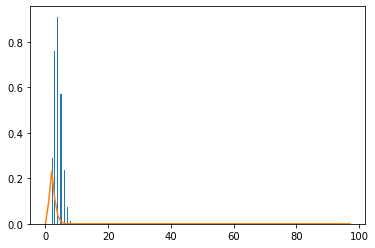

In [118]:
plt.hist(degrees, density=True, bins=20)
plt.plot(distr_fit)
plt.show()

#### Barabasi-Albert model

In [90]:
BAM = Barabasi_Albert_model().generate()

Number of nodes: 2000
Number of edges: 3984
Average degree: 3.984
Variance of degree: 31.362744000000003


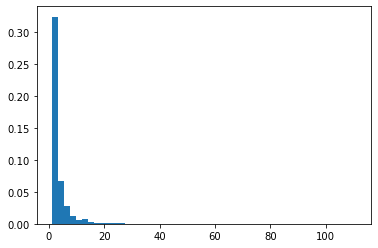

In [96]:
print(f"Number of nodes: {BAM.number_of_nodes()}")
print(f"Number of edges: {BAM.number_of_edges()}")
degrees = [val for (node, val) in BAM.degree()]
print(f"Average degree: {np.mean(degrees)}")
print(f"Variance of degree: {np.var(degrees)}")
plt.hist(degrees, density=True, bins=50)
plt.show()

In [142]:
def power_law(x, a, b):
    return a*np.power(x, b)

In [145]:
pars, cov = curve_fit(f=power_law, xdata=xs, ydata=degrees, p0=[0, 0], bounds=(-np.inf, np.inf))

C:\Users\lab\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


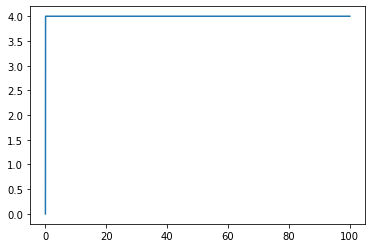

In [146]:
plt.plot(xs, power_law(xs, *pars))

## Not working

In [132]:
def func_powerlaw(x, m, c, c0):
    return c0 + x**m * c

In [138]:
xs = np.linspace(0, 100, 2000)
popt, pcov = curve_fit(func_powerlaw, xs, degrees, maxfev=2000)

C:\Users\lab\AppData\Local\Temp\ipykernel_14024\842013145.py:2: RuntimeWarning: divide by zero encountered in power
  return c0 + x**m * c


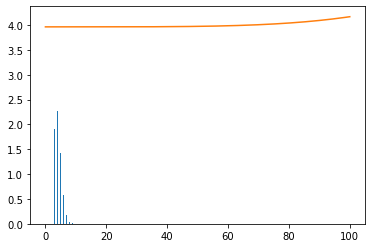

In [140]:
plt.hist(degrees, density=True, bins=50)
plt.plot(xs, func_powerlaw(xs, *popt))